In [125]:
# @title Import library

# data handling
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
import tensorflow as tf
from tensorflow import keras

# Feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [126]:
# @title Import dataset
raw_dataset = pd.read_csv("hf://datasets/Deydeyi/life-expectancy/Life Expectancy Data.csv")

# **Dataset Exploration**

In [127]:
raw_dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [128]:
types = raw_dataset.dtypes
nulls = raw_dataset.isnull().sum()
info = pd.DataFrame({"Type": types, "Nulls": nulls})
info


,Type,Nulls
Country,object,0
Year,int64,0
Status,object,0
Life expectancy,float64,10
Adult Mortality,float64,10
infant deaths,int64,0
Alcohol,float64,194
percentage expenditure,float64,0
Hepatitis B,float64,553
Measles,int64,0


# **Dataset Cleaning and Preprocessing**

In [129]:
# @title Drop Irrelevant Features
dataset = raw_dataset.drop(["Country", "Year"], axis=1)

In [130]:
# @title Rename Features
dataset = dataset.rename(columns={"Income composition of resources": "Income composition"})

In [131]:
# @title Format Feature Labels
dataset.columns = dataset.columns.str.strip()
dataset.columns = dataset.columns.str.lower()

In [132]:
# @title Drop Duplicates
dataset = dataset.drop_duplicates()

In [133]:
# @title Drop Incomplete Rows
dataset = dataset.dropna()

In [134]:
# @title Reset Index
dataset.reset_index(drop=True, inplace=True)

In [135]:
# @title Initial dataset
dataset

,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition,schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## **Split Dataset**

In [136]:
X = dataset.drop("life expectancy", axis=1)
y = dataset["life expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Size:", len(X_train))
print("Test Size:", len(X_test))

Train Size: 1319
Test Size: 330


# **Feature Engineering**

In [137]:
# @title Encode Ordinal Features
status_order = ["Developing", "Developed"]
ordinal_encoder = OrdinalEncoder(categories=[status_order])
X_train["status"] = ordinal_encoder.fit_transform(X_train[["status"]])

joblib.dump(ordinal_encoder, 'encoder.joblib')

['encoder.joblib']

### **Handle Dataset Outliers**

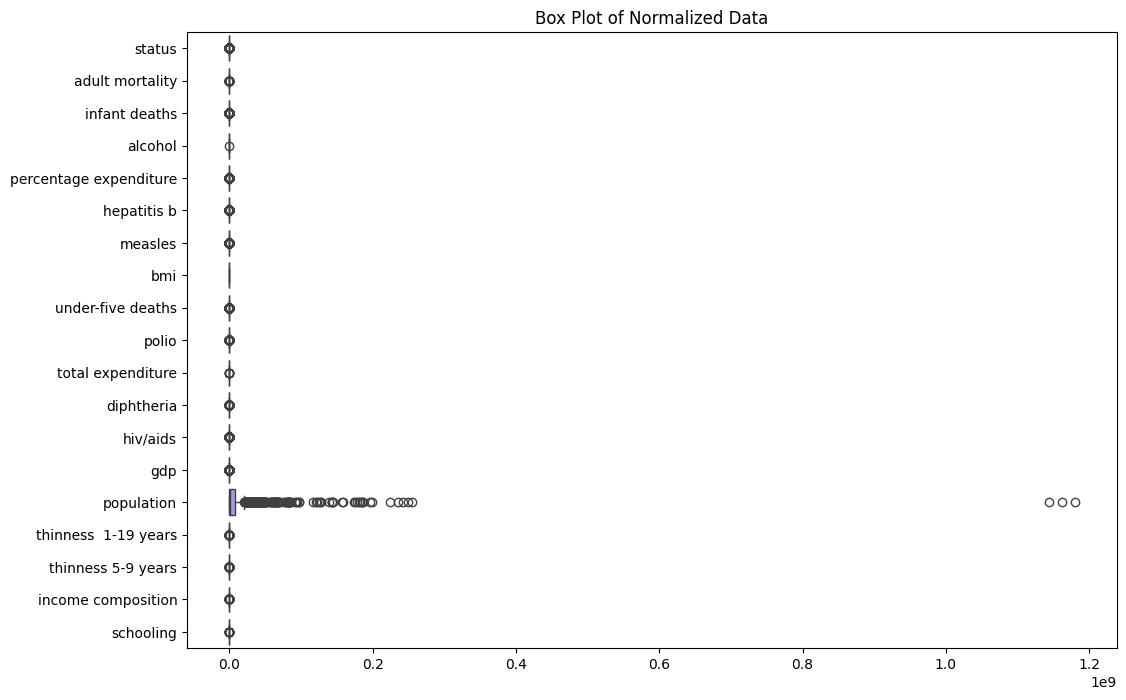

In [138]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train, orient='h')
plt.title('Box Plot of Normalized Data')
plt.show()

In [139]:
# @title Remove Outliers using Z-Score
print("Original Data Shape:", X_train.shape)

z_scores = np.abs(stats.zscore(X_train))
outliers = (z_scores > 3).any(axis=1)
X_train = X_train[~outliers]
y_train = y_train[~outliers]

print("Processed Data Shape:", X_train.shape)

Original Data Shape: (1319, 19)
Processed Data Shape: (1026, 19)


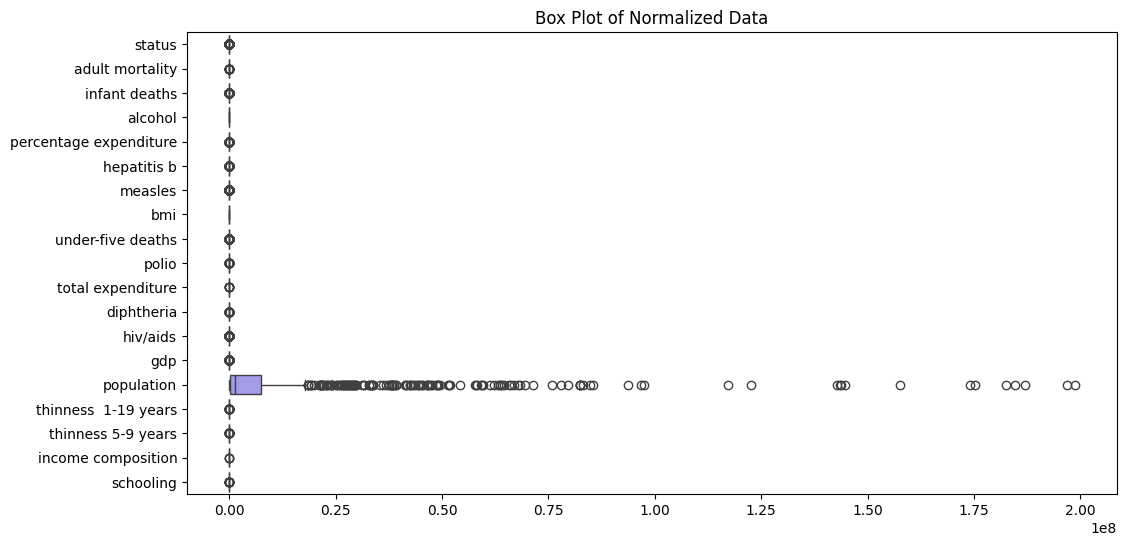

In [140]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train, orient='h')
plt.title('Box Plot of Normalized Data')
plt.show()

# **Feature Selection**

In [141]:
# @title Use DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)

## **Check for multicollinearity**

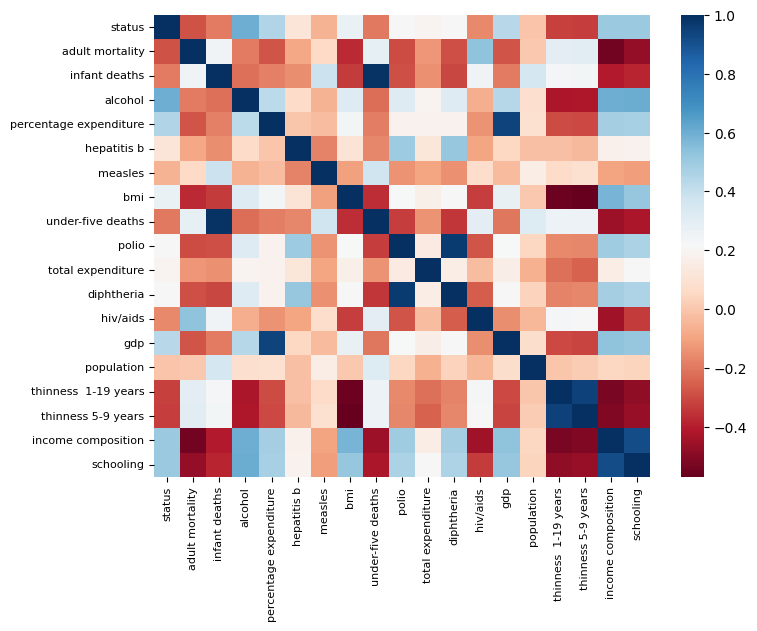

In [142]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, cmap="RdBu")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [143]:
highly_correlated = correlation_matrix[abs(correlation_matrix) > 0.8]
highly_correlated = highly_correlated.stack().reset_index()
highly_correlated.columns = ["Feature 1", "Feature 2", "Correlation"]
highly_correlated = highly_correlated[highly_correlated["Feature 1"] != highly_correlated["Feature 2"]]
highly_correlated

,Feature 1,Feature 2,Correlation
3,infant deaths,under-five deaths,0.991651
6,percentage expenditure,gdp,0.940488
10,under-five deaths,infant deaths,0.991651
13,polio,diphtheria,0.964632
15,diphtheria,polio,0.964632
18,gdp,percentage expenditure,0.940488
22,thinness 1-19 years,thinness 5-9 years,0.945021
23,thinness 5-9 years,thinness 1-19 years,0.945021
26,income composition,schooling,0.918540
27,schooling,income composition,0.918540


In [144]:
constant = add_constant(X_train)
# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = constant.columns
vif['VIF'] = [variance_inflation_factor(constant.values, i) for i in range(constant.shape[1])]
print(vif)

                   Feature         VIF
0                    const  157.104451
1                   status    1.830752
2          adult mortality    1.736909
3            infant deaths   92.583705
4                  alcohol    2.314326
5   percentage expenditure    9.474981
6              hepatitis b    1.492191
7                  measles    1.215244
8                      bmi    1.894309
9        under-five deaths   96.707926
10                   polio   15.160749
11       total expenditure    1.154631
12              diphtheria   15.506812
13                hiv/aids    1.728031
14                     gdp    9.706928
15              population    1.271196
16    thinness  1-19 years   10.293640
17      thinness 5-9 years   10.372304
18      income composition   10.218235
19               schooling    7.122112


In [145]:
# @title Remove Highly Correlated Features

feature_to_remove = ["income composition", "thinness 5-9 years", "diphtheria", "under-five deaths", "percentage expenditure"]
X_train = X_train.drop(feature_to_remove, axis=1, errors='ignore')

In [146]:
# @title Check Multicollinearity
constant = add_constant(X_train)
vif = pd.DataFrame()
vif['Feature'] = constant.columns
vif['VIF'] = [variance_inflation_factor(constant.values, i) for i in range(constant.shape[1])]
print(vif)

                 Feature         VIF
0                  const  121.542060
1                 status    1.763336
2        adult mortality    1.677432
3          infant deaths    1.685387
4                alcohol    2.209991
5            hepatitis b    1.405766
6                measles    1.199810
7                    bmi    1.758836
8                  polio    1.786396
9      total expenditure    1.104380
10              hiv/aids    1.533828
11                   gdp    1.477494
12            population    1.241907
13  thinness  1-19 years    1.677920
14             schooling    2.782196


## **Apply RFE** (Optional)

In [147]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [148]:
removed_features = X_train.columns[~rfe.support_]
print("Removed features:", removed_features)

# Get the selected features (True means selected)
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Removed features: Index(['infant deaths', 'measles', 'gdp', 'population'], dtype='object')
Selected features: Index(['status', 'adult mortality', 'alcohol', 'hepatitis b', 'bmi', 'polio',
       'total expenditure', 'hiv/aids', 'thinness  1-19 years', 'schooling'],
      dtype='object')


In [149]:
X_train = X_train[selected_features]

## **Apply L1 Regularization** (Optional)

In [150]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

coef = lasso.coef_

selected_features = X_train.columns[coef != 0]
removed_features = X_train.columns[coef == 0]

print("Removed Features:", removed_features)
print("Selected Features:", selected_features)

Removed Features: Index([], dtype='object')
Selected Features: Index(['status', 'adult mortality', 'alcohol', 'hepatitis b', 'bmi', 'polio',
       'total expenditure', 'hiv/aids', 'thinness  1-19 years', 'schooling'],
      dtype='object')


In [151]:
X_train = X_train[selected_features]

## Final Features

In [152]:
model_features = X_train.columns

In [153]:
# @title Normalize Dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

# **Model Training**

In [154]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [155]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.56790301 -1.87347281 -0.38663853 -0.32064412  0.41521399  0.82879538
  0.23522173 -1.98550707 -0.70642437  3.32805439]
Intercept: 70.17553606237817


## **Model Performance**

In [156]:
# @title Load Encoder and Scaler
ordinal_encoder = joblib.load('encoder.joblib')
scaler = joblib.load('scaler.joblib')

In [157]:
# @title Filter Features
X_test = X_test[model_features]

In [158]:
# @title Apply preprocessor
X_test["status"] = ordinal_encoder.transform(X_test[["status"]])
X_test = scaler.transform(X_test)

<ipython-input-158-72aaca4570a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["status"] = ordinal_encoder.transform(X_test[["status"]])


In [159]:
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.7236579332929606
Mean Absolute Error: 3.2954342363442914
Mean Squared Error: 19.62650014419664
Root Mean Squared Error: 4.43018059950118
